In [4]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, seaborn as sns
import pcmdpy as ppy
from scipy.stats import lognorm
%matplotlib inline

In [2]:
f = ppy.instrument.m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model, gpu=False)

/Users/bcook/.local/lib/python3.6/site-packages/pcmdpy/driver.py:25: RuntimeWarning: GPU acceleration not available. Continuing without.
  warnings.warn('GPU acceleration not available. Continuing without.', RuntimeWarning)


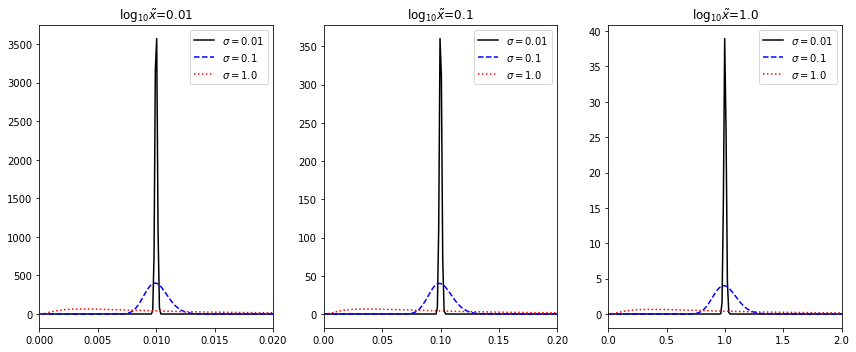

In [15]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 5))
x = np.logspace(-4, 1, 1000)
mu = [0.01, 0.1, 1.]
sig = [0.01, 0.1, 1.]
for i, ax in enumerate(axes):
    ax.plot(x, lognorm.pdf(x, sig[0], scale=mu[i]), 'k-', label=r'$\sigma=$'+str(sig[0]))
    ax.plot(x, lognorm.pdf(x, sig[1], scale=mu[i]), 'b--', label=r'$\sigma=$'+str(sig[1]))
    ax.plot(x, lognorm.pdf(x, sig[2], scale=mu[i]), 'r:', label=r'$\sigma=$'+str(sig[2]))
    ax.legend(loc=0)
    ax.set_title(r'$\log_{10}\tilde{x}$='+str(mu[i]))
axes[0].set_xlim([0, 0.02])
axes[1].set_xlim([0, 0.2])
axes[2].set_xlim([0, 2.])
plt.tight_layout()

In [123]:
mu = [-2., -1., 0.]
sig = [0.1, 0.3, 1.]

In [124]:
gm = ppy.galaxy.CustomGalaxy(ppy.metalmodels.SingleFeH, ppy.dustmodels.LogNormDust, ppy.agemodels.SSPModel)
gals = [[gm.get_model(np.array([0., a, b, 5., 10])) for b in sig] for a in mu]

In [125]:
nr = len(mu)
nc = len(sig)

In [126]:
pcmds = [[driv.simulate(gals[i][j], 128, psf=True)[0] for j in range(nc)] for i in range(nr)]

In [127]:
pcmds_all = np.hstack(np.vstack(pcmds))
bins = [np.linspace(pcmds_all[0].min(), pcmds_all[0].max(), 100), np.linspace(pcmds_all[1].min(), pcmds_all[1].max(), 100)]

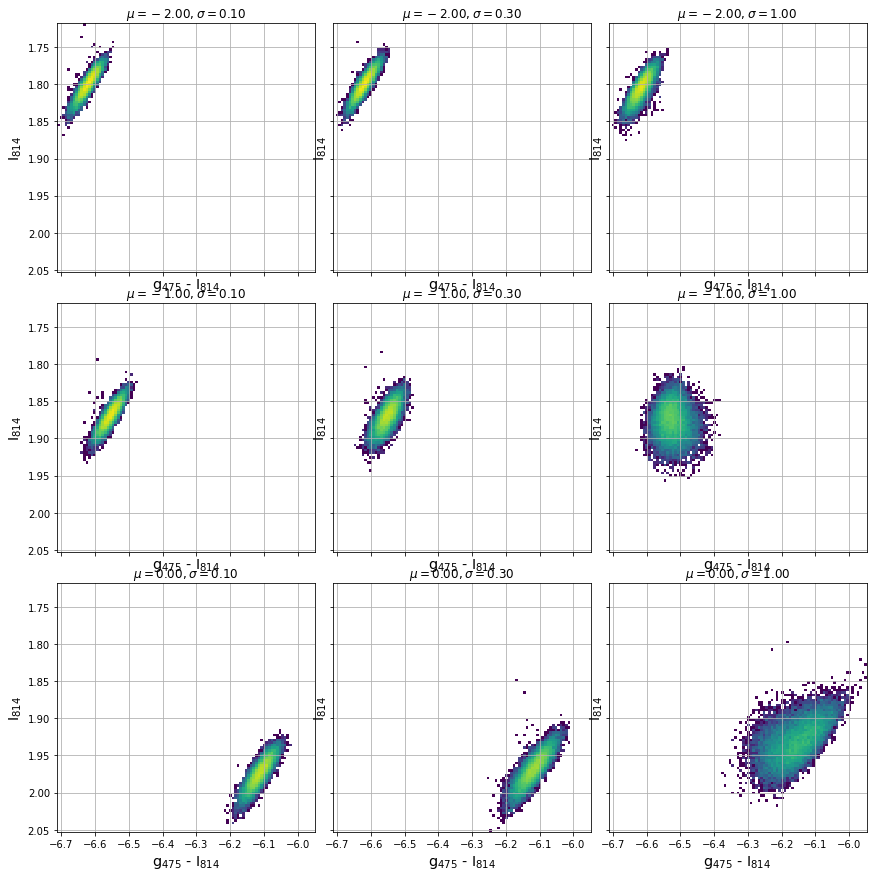

In [128]:
fig, axes = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 12), sharex=True, sharey=True)
n = mpl.colors.LogNorm()
for i in range(nr):
    for j in range(nc):
        ax = axes[i, j]
        plt.subplot(ax)
        pcmd = pcmds[i][j]
        plt.hist2d(pcmd[0], pcmd[1], bins=bins, norm=n)
        ax.set_title(r'$\mu = {:.2f}, \sigma = {:.2f}$'.format(mu[i], sig[j]))
plt.tight_layout()
for a in axes.flatten(): 
    a.grid(True)
    iso_model.plot_isochrone(gals[0][0], axes=a)